In [ ]:
#|default_exp app

# Dogs v Cats

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

/home/calle/mambaforge/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


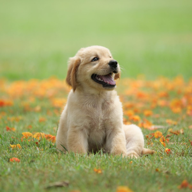

In [3]:
im = PILImage.create("dog.jpg")
im.thumbnail((192, 192))
im

In [4]:
#|export
learn = load_learner("model.pkl")

In [5]:
%time learn.predict(im)

CPU times: user 697 ms, sys: 449 ms, total: 1.15 s
Wall time: 177 ms


('False', tensor(0), tensor([9.9999e-01, 6.1059e-06]))

In [6]:
#|export
categories = ("Dog", "Cat")

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [7]:
classify_image(im)

{'Dog': 0.9999939203262329, 'Cat': 6.105902684794273e-06}

In [8]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ["dog.jpg", "cat.jpg"]

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

/home/calle/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/calle/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/calle/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/calle/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# Export

In [ ]:
import nbdev

In [ ]:
nbdev.export.nb_export("app.ipynb", "./")